# WQD7003 Data Analytics Group Project
## Loan Default Prediction
### Kaggle Dataset - https://www.kaggle.com/c/loan-default-prediction/overview


#### Import packages
- os     - operating system functionality
- pandas - manipulating data structures
- numpy  - manipulating arrays and matrices, mathematical functions
- matplotlib - plots

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Identify current working directory and dataset path
- Train and Test dataset provided.
- An example of sample submission also provided. 
- All dataset in CSV file format. 

In [2]:
cwd = os.getcwd()
print(cwd)


C:\GitCloneDir\wqd7003_project\project_wqd7003_git


In [3]:
train_path = "C:\\GitCloneDir\\wqd7003_project\\data\\train_v2.csv"
test_path = "C:\\GitCloneDir\\wqd7003_project\\data\\test_v2.csv"


#### Load training data into Pandas dataframe
Note: to get hints to help with code completion, press "Tab" or "Shift + Tab"
1. Check file size. 
2. Load training dataset to dataframe.
3. Random split data to reduce computation and load times. 
4. View number of rows (records) and columns (attributes).
5. Overview of dataframe (info and describe())
6. Data types 
7. Looking at null values

In [4]:
# Have a look at training file size
file_size = int(os.path.getsize(train_path)/1024)  

if file_size > 99999:
    final_size = str(file_size/1000) + " MB"
else:
    final_size = str(file_size) + " KB"

print(final_size)


498.987 MB


In [5]:
df = pd.read_csv(train_path, low_memory=False)
df_train = df.sample(frac=0.35, random_state=0)


In [6]:
# Number of rows and columns
print(str(len(df_train)) + " rows")
print(str(len(df_train.columns)) + " columns")


36915 rows
771 columns


In [7]:
# Number of rows, columns, & other info
df_train.info


<bound method DataFrame.info of             id   f1  f2        f3    f4  f5     f6      f7      f8      f9  \
43476    43477  126  10  0.307234  1500  16  81166  2571.0  2217.0  126.76   
104242  104243  121   6  0.549930  1800   4   2277  5263.0  3210.0  124.50   
64651    64652  138   9  0.603740  3500   7  75884   231.0  2851.0  143.10   
74393    74394  126   3  0.393476  2200   4   3659  6035.0  4017.0  127.70   
28212    28213  133   9  0.658447  3500   7  76973  7248.0  1253.0  132.54   
...        ...  ...  ..       ...   ...  ..    ...     ...     ...     ...   
17663    17664  117  10  0.863017  1500   4   8563    47.0   658.0  118.25   
621        622  125   8  0.341056  1800   4  12769  1210.0  1640.0  118.45   
53077    53078  127   8  0.757637  2100  16   8563  8506.0  1575.0  130.50   
32772    32773  119  10  0.835838  2200  15  11699   381.0  1134.0  119.15   
56923    56924  163   7  0.368922  4200   7  82432   498.0  3511.0  155.15   

        ...  f770   f771   f772

In [8]:
# Take a quick look at the data
df_train.describe()


,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
count,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36915.000000,36847.000000,36875.000000,36915.000000,...,36915.000000,36915.000000,36915.000000,36915.000000,36552.000000,36404.000000,36915.000000,36915.000000,36915.000000,36915.000000
mean,52724.687336,134.582175,8.240282,0.498371,2670.843830,7.378545,47864.246919,2986.554591,2449.148881,134.511458,...,17.381200,5.781511,-4.232515,3.262156,0.234393,0.010745,0.310822,0.321197,178.687255,0.799269
std,30463.238836,14.725677,1.703544,0.289190,1403.195577,5.174325,35687.048346,2557.027595,2280.352004,13.807276,...,18.413914,6.459544,4.792628,3.739509,0.073412,1.034464,0.462836,0.466943,301.478556,4.299221
min,2.000000,103.000000,1.000000,0.000040,1100.000000,1.000000,0.000000,1.000000,1.000000,107.910000,...,2.000000,0.000000,-42.710000,0.000000,0.000000,-17.498900,0.000000,0.000000,2.000000,0.000000
25%,26367.500000,124.000000,8.000000,0.248443,1500.000000,4.000000,11255.000000,634.000000,743.000000,124.270000,...,5.000000,1.480000,-5.670000,0.750000,0.199800,-0.704225,0.000000,0.000000,19.000000,0.000000
50%,52812.000000,129.000000,9.000000,0.496777,2200.000000,4.000000,76530.000000,2290.000000,1785.000000,128.410000,...,11.000000,3.570000,-2.600000,1.990000,0.252300,0.368100,0.000000,0.000000,40.000000,0.000000
75%,78984.500000,148.000000,9.000000,0.750335,3600.000000,10.000000,80135.000000,4700.000000,3430.500000,148.880000,...,23.000000,7.670000,-1.020000,4.410000,0.283800,0.734700,1.000000,1.000000,104.000000,0.000000
max,105470.000000,176.000000,11.000000,0.999970,7900.000000,17.000000,88399.000000,9962.000000,11541.000000,171.770000,...,167.000000,58.120000,0.000000,32.780000,0.473700,11.092000,1.000000,1.000000,1212.000000,100.000000


In [9]:
# Data types int64, float64, object
col_names = df_train.columns.values

# Get  columns whose data type is object i.e. string, int64, float64
filtColObj = df_train.dtypes[df_train.dtypes == np.object]
filtColInt = df_train.dtypes[df_train.dtypes == np.int64]
filtColFlt = df_train.dtypes[df_train.dtypes == np.float64]
 
# list of columns whose data type is object i.e. string, int64, float64
listColNamesObj = list(filtColObj.index)
listColNamesInt = list(filtColInt.index)
listColNamesFlt = list(filtColFlt.index)
 
print(str(len(listColNamesObj)) + " Objects")
print(str(len(listColNamesInt)) + " Int64")
print(str(len(listColNamesFlt)) + " Float64")


19 Objects
99 Int64
652 Float64


In [10]:
# Taking a look at null values
df_train.isnull()


,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
43476,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
104242,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64651,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
74393,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28212,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17663,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
621,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
53077,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32772,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
# Remove rows that has all NULL values - in this case, none of the rows have all NULL values
df_train = df_train.dropna(axis=0, how='all')
print(len(df_train))

# Remove columns that has all NULL values - in this case, none of the columns have all NULL values
df_train = df_train.dropna(axis=1, how='all')
print(len(df_train.columns))


36915
771


In [12]:
# Find max percentage of NULL values per column
print(max(df_train.isnull().mean(axis=0))*100)

# Find max percentage of NULL values per row
print(max(df_train.isnull().mean(axis=1))*100)


17.800352160368412
44.87678339818418


In [13]:
# View of data with null values
df_train_null = df_train.loc[:,df_train.isnull().mean()>0]
print(df_train_null.head(5))
print(df_train_null.tail(5))

# Number of columns with null values
len(df_train_null.columns)


            f7      f8     f14     f15     f17     f18     f19     f20  \
43476   2571.0  2217.0  0.7265  0.7203  0.7203  0.7203  0.4871  0.7265   
104242  5263.0  3210.0  0.8739  0.8387  0.8455  0.8387  0.6877  0.8387   
64651    231.0  2851.0  0.0000  0.0000  0.0000  0.0000  0.0769  0.0000   
74393   6035.0  4017.0  0.8197  0.8197  0.8000  0.8000  0.6552  0.8065   
28212   7248.0  1253.0  0.8636  0.8407  0.8120  0.8120  0.6644  0.8407   

           f21     f22  ...     f757    f758    f759      f760     f761  \
43476   0.7456  0.7456  ...   5.3580  4.1735  3.2692  0.062208   6.7402   
104242  0.9123  0.9043  ...   2.1423  1.8442  1.6037  0.097507   2.5248   
64651   0.0000  0.0000  ...   7.2960  5.5056  4.2457  0.367089   8.9215   
74393   0.8065  0.8065  ...  10.7355  9.7894  8.9452  0.044094  12.0256   
28212   0.9500  0.8482  ...   8.7038  7.7867  6.9926  0.054783  11.0370   

           f762    f763  f765    f774    f775  
43476    6.2117 -0.2544  0.00  0.3335 -0.4681  
104242  

525

In [14]:
# Columns with float or int data types
df_train_obj = df_train_null.loc[:, df_train_null.dtypes=='object']
print(df_train_obj.head())


                        f137                        f138  \
43476       1310000000000000        98870400435828998144   
104242  45723353039583002624  82266081252861995401609216   
64651          1350000000000            9050000000000000   
74393      73000000000000000     14190769661866999283712   
28212      10400000000000000      1350797145644000083968   

                        f206                         f207  \
43476            14564170412               33400000000000   
104242  52641157214791000064  109086041397580002356101120   
64651            38100719961               84000000000000   
74393      78800000000000000      16070116981790000283648   
28212          5170000000000            49300000000000000   

                        f276                         f277  \
43476        415000000000000         17563793138655000576   
104242  53478347621602000896  109594634882269997250379776   
64651         30200000000000           325000000000000000   
74393    2780000000000000000

In [15]:
df_train_obj.describe()

,f137,f138,f206,f207,f276,f277,f390,f391,f626,f627,f695,f698
count,36847,36847,36473,36473,36875,36875,36687,36687,36687,36687,36687,36687
unique,3678,16998,9500,9181,3454,15574,36673,36671,36685,36683,33444,32807
top,3870000000000000,0,0,0,1240000000000000,116000000000000000,4585819461816299954431328256,6047083129147399870720121575986692096,5167416158078900268779438080,7090680550168100523564513132407685120,3590000000000000000,4520000000000000000
freq,265,159,1862,1862,244,125,3,3,3,3,13,15


#### Columns with Object data types does not make any sense. Therefore shall be dropped.


In [16]:
df_train_null = df_train_null.drop(df_train_obj.columns.values, axis=1)


In [19]:
df_train_null.describe()


,f7,f8,f14,f15,f17,f18,f19,f20,f21,f22,...,f757,f758,f759,f760,f761,f762,f763,f765,f774,f775
count,36847.000000,36875.000000,36875.000000,36892.000000,36856.000000,36904.000000,36904.000000,36753.000000,36267.000000,36316.000000,...,36656.000000,36656.000000,36656.000000,36461.000000,36856.000000,36856.000000,36267.000000,36914.000000,36552.000000,36404.000000
mean,2986.554591,2449.148881,0.696295,0.678069,0.673510,0.648957,0.510359,0.685725,0.746074,0.726449,...,10.560316,8.746051,7.309476,0.136267,12.878029,12.061513,-0.253926,-0.471214,0.234393,0.010745
std,2557.027595,2280.352004,0.243126,0.242331,0.233165,0.247664,0.173677,0.241718,0.238366,0.234298,...,12.789758,10.905417,9.356903,0.112744,14.850395,14.036544,0.238366,0.284813,0.073412,1.034464
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-0.970000,0.000000,-17.498900
25%,634.000000,743.000000,0.680000,0.661300,0.656000,0.635600,0.431775,0.669400,0.729000,0.710500,...,2.552900,1.965475,1.539700,0.056635,3.370900,3.066200,-0.271000,-0.710000,0.199800,-0.704225
50%,2290.000000,1785.000000,0.771200,0.754200,0.745800,0.736000,0.539600,0.761900,0.818200,0.798200,...,5.842850,4.688300,3.810550,0.082184,7.563000,7.047850,-0.181800,-0.500000,0.252300,0.368100
75%,4700.000000,3430.500000,0.831900,0.815400,0.804900,0.796700,0.626900,0.823500,0.876100,0.857100,...,13.252350,10.923850,9.117900,0.219610,16.462750,15.416750,-0.123900,-0.230000,0.283800,0.734700
max,9962.000000,11541.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,111.937000,95.102300,82.293100,0.490885,127.195100,120.425000,0.000000,0.000000,0.473700,11.092000


['f14' 'f15' 'f17' 'f18' 'f19' 'f20' 'f21' 'f22' 'f32' 'f39' 'f40' 'f41'
 'f43' 'f44' 'f45' 'f46' 'f47' 'f49' 'f50' 'f51' 'f53' 'f54' 'f55' 'f56'
 'f57' 'f59' 'f60' 'f61' 'f63' 'f64' 'f65' 'f66' 'f75' 'f77' 'f80' 'f81'
 'f82' 'f83' 'f84' 'f89' 'f90' 'f91' 'f92' 'f93' 'f94' 'f99' 'f100' 'f101'
 'f102' 'f103' 'f104' 'f109' 'f110' 'f111' 'f112' 'f113' 'f114' 'f119'
 'f120' 'f121' 'f122' 'f123' 'f124' 'f129' 'f130' 'f131' 'f140' 'f141'
 'f142' 'f144' 'f149' 'f150' 'f151' 'f152' 'f153' 'f158' 'f159' 'f160'
 'f161' 'f162' 'f163' 'f168' 'f169' 'f170' 'f171' 'f172' 'f173' 'f178'
 'f179' 'f180' 'f181' 'f182' 'f183' 'f188' 'f189' 'f190' 'f191' 'f192'
 'f193' 'f198' 'f199' 'f200' 'f209' 'f210' 'f211' 'f213' 'f218' 'f219'
 'f220' 'f221' 'f222' 'f223' 'f228' 'f229' 'f230' 'f231' 'f232' 'f233'
 'f238' 'f239' 'f240' 'f241' 'f242' 'f243' 'f248' 'f249' 'f250' 'f251'
 'f252' 'f253' 'f258' 'f259' 'f260' 'f261' 'f262' 'f263' 'f268' 'f269'
 'f270' 'f279' 'f280' 'f289' 'f330' 'f331' 'f340' 'f341' 'f349' 'f3

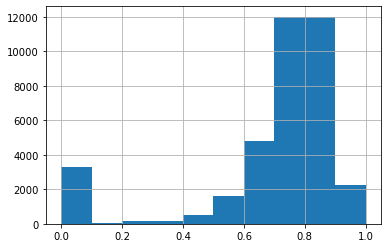

In [22]:
# having a look at histogram (data < 3 std)
less_3sd = df_train_null.loc[:, df_train_null.std()<3]
print(less_3sd.columns.values)
less_3sd['f14'].hist()
plt.show()

['f7' 'f8' 'f23' 'f26' 'f31' 'f42' 'f48' 'f52' 'f58' 'f62' 'f72' 'f76'
 'f78' 'f79' 'f85' 'f86' 'f87' 'f88' 'f95' 'f96' 'f97' 'f98' 'f105' 'f106'
 'f107' 'f108' 'f115' 'f116' 'f117' 'f118' 'f125' 'f126' 'f127' 'f128'
 'f132' 'f133' 'f134' 'f135' 'f136' 'f139' 'f143' 'f145' 'f146' 'f147'
 'f148' 'f154' 'f155' 'f156' 'f157' 'f164' 'f165' 'f166' 'f167' 'f174'
 'f175' 'f176' 'f177' 'f184' 'f185' 'f186' 'f187' 'f194' 'f195' 'f196'
 'f197' 'f201' 'f202' 'f203' 'f204' 'f205' 'f208' 'f212' 'f214' 'f215'
 'f216' 'f217' 'f224' 'f225' 'f226' 'f227' 'f234' 'f235' 'f236' 'f237'
 'f244' 'f245' 'f246' 'f247' 'f254' 'f255' 'f256' 'f257' 'f264' 'f265'
 'f266' 'f267' 'f271' 'f272' 'f273' 'f274' 'f275' 'f278' 'f348' 'f356'
 'f365' 'f373' 'f386' 'f387' 'f388' 'f389' 'f392' 'f393' 'f394' 'f401'
 'f437' 'f438' 'f439' 'f440' 'f452' 'f453' 'f454' 'f455' 'f456' 'f457'
 'f459' 'f460' 'f461' 'f476' 'f481' 'f482' 'f483' 'f484' 'f485' 'f486'
 'f487' 'f488' 'f490' 'f491' 'f492' 'f493' 'f494' 'f495' 'f496' 'f497'
 '

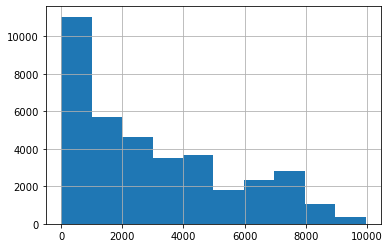

In [25]:
# having a look at histogram (data > 3 std)
more_3sd = df_train_null.loc[:, df_train_null.std()>3]
print(more_3sd.columns.values)
more_3sd['f7'].hist()
plt.show()